# Análise a partir da expectativa de gols
***Ciência de Dados e Inteligência Artificial***

**Desenvolvedores**

Felipe Rojas <br>
Gabriel Arai <br>
Gabriel Rodrigues <br>
João Vitor <br>
Murillo Martins <p>

**Professor orientador**

Rooney Ribeiro <p>

**Acesse o nosso artigo em:** xxxxxxxxx

##Objetivo do trabalho
xxxxx

## Metodologia
xxxxxx

## Sobre os dados

Os dados utilizados neste estudo foram extraídos do site [Understat](https://understat.com/), através da biblioteca [WorldFootball
](https://github.com/JaseZiv/worldfootballR) desenvolvida por Jason Zivkovic. Foram coletadas 362.781 finalizações realizadas na primeira divisão do campeonato inglês (Premier League), alemão (Bundesliga), francês (Ligue 1), italiano (Serie A) e espanhol (La Liga), entre as temporadas de 2014-15 a 2021-22. <p>

### Os 21 atributos para cada finalização

`league`: campeonato cujo clube está disputando; <br>
`id`: identificador único da finalização; <br>
`minute`: minuto exato da partida ao qual a finalização ocorreu; <br>
`result`: resultado da finalização; <br>
`X`: coordenada X do local de origem da finalização; <br>
`Y`: coordenada Y do local de origem da finalização; <br>
`xG`: probabilidade da finalização resultar em gol, com base em outras finalizações realizadas através de pontos de origem similares; <br>
`player`: jogador responsável pela finalização; <br>
`h_a`: se a finalização foi realizada pelo time da casa ou pelo time visitante; <br>
`player_id`: identificador único do jogador responsável pela finalização; <br>
`situation`: tipo de jogada construída que precede a finalização; <br>
`season`: temporada na qual a partida ocorreu; <br>
`shotType`: parte do corpo utilizada para realização da finalização; <br>
`match_id`: identificador único da partida; <br>
`home_team`: time da casa na partida; <br>
`away_team`: time visitante na partida; <br>
`home_goals`: quantidade de gols marcados pelo time da casa na partida; <br>
`away_goals`: quantidade de gols marcados pelo time visitante na partida; <br>
`date`: data e horário da partida; <br>
`player_assisted`: jogador responsável pelo passe que precedeu a finalização; e <br>
`lastAction`: tipo de passe realizado para o jogador responsável pela finalização.

### Significado dos resultados possíveis da coluna *result*
</br>
SavedShot: Defesa do goleiro </p>
BlockedShot: Chute bloqueado </p>
Goal: Gol </p>
MissedShots: Chute para fora </p>
ShotOnPost: Chute na trave </p>
OwnGoal: Gol contra </p>

### Significado dos resultados possíveis da coluna *lastAction* 
</br>
Aerial: Jogada aérea ou no alto </p>
BallRecovery: Recuperação de bola </p>
BallTouch: Toque na bola </p>
BlockedPass: Passe bloqueado </p>
Card: Cartão </p>
Challenge: Disputa ou lance duvidoso </p>
ChanceMissed: Oportunidade de gol perdida </p>
Chipped: Lançamento em arco ou com efeito </p>
Clearance: Chutão para afastar a bola da área </p>
CornerAwarded: Escanteio concedido </p>
Cross: Cruzamento </p>
CrossNotClaimed: Cruzamento não interceptado pelo goleiro </p>
Dispossessed: Desarmado ou perda de posse de bola </p>
End: Fim de um período de jogo ou de uma partida </p>
Error: Erro ou falha </p>
FormationChange: Mudança na formação tática da equipe </p>
Foul: Falta </p>
Goal: Gol </p>
GoodSkill: Habilidade ou jogada de qualidade </p>
HeadPass: Passe de cabeça </p>
Interception: Intercepção ou corte de passe </p>
KeeperPickup: Goleiro pega a bola com as mãos </p>
KeeperSweeper: Goleiro joga como líbero </p>
LayOff: Tocada de bola para um companheiro próximo </p>
None: Nenhum ou ausência de evento </p>
OffsidePass: Passe em posição de impedimento </p>
OffsideProvoked: Impedimento provocado </p>
Pass: Passe </p>
PenaltyFaced: Pênalti sofrido </p>
Punch: Socada ou chutão do goleiro com o punho </p>
Rebound: Rebote ou ressalto </p>
Save: Defesa de goleiro </p>
ShieldBallOpp: Proteção de bola contra o adversário </p>
Smother: Defesa do goleiro abafando o chute do adversário. </p>
Standard: Jogada comum ou não especial </p>
Start: Início de um período de jogo ou de uma partida </p>
SubstitutionOff: Substituição - jogador sai de campo </p>
SubstitutionOn: Substituição - jogador entra em campo </p>
Tackle: Tackle ou desarme </p>
TakeOn: Drible ou finta </p>
Throughball: Passagem em profundidade </p>

## Funções de auxílio

In [ ]:
def filtrar_por_equipe(dataframe, equipe):
  """ Função que filtra o conjunto de dados com finalizações dadas apenas por um clube.

      dataframe: inserir conjunto de dados desejado; e
      equipe: inserir string contendo o nome da equipe.
  """

  return dataframe.loc[((dataframe['h_a'] == 'h') & (dataframe['home_team'] == equipe)) | 
                      ((dataframe['h_a'] == 'a') & (dataframe['away_team'] == equipe))]

In [ ]:
def xg_vs_gols(dataframe, equipe):
  """
  """

  df = filtrar_por_equipe(dataframe, equipe)
  return df.groupby('season').agg({'xG':'sum', 'result': lambda x: (x=='Goal').sum()})

In [ ]:
def arredondar(lista, casas):
  """ Função para arredondar elementos de uma lista, conforme o número de casas decimais desejados.
      lista: inserir uma lista unidimensional apenas com floats (números não inteiros);
      casas: inserir o número de casas decimais desejadas, apenas números naturais.
  """
  
  return [round(i,casas) for i in lista]

In [ ]:
def imprimir_ordenado(dicionario, decrescente=True):
  """ Função para imprimir um dicionário em ordem crescente ou descrescente.
      dicionario: inserir uma variável contendo um dicionário;
      descrescente: 'True' por padrão. Inserir 'False' caso queira a ordem crescente.
  """
  
  for i in sorted(dicionario, key = dicionario.get, reverse=decrescente):
    print(f'{i}: {dicionario[i]}')

In [ ]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source
from sklearn.tree import export_graphviz

def arvore_de_decisao(criterio, no_raiz, profundidade, min_amostras_no, min_amostras_folha=0.2):
  """ Função que cria uma árvore de decisão com parâmetros editáveis.

      criterio: inserir string contendo o critério a ser utilizado ('gini' ou 'entropy');
      no_raiz: inserir string contendo o critério para escolha do nó raiz, entre o de melhor resultado ou aleatório ('best' ou 'random');
      profundidade: inserir número inteiro contendo a profundidade desejada;
      min_amostras_no: inserir o número de amostras mínimas desejado para considerar um nó para divisão; e
      min_amostras_folha (opcional): inserir o número de amostras mínimas no nível folha. Por padrão, 0.2.      
  """
  
# Criação de um classificador "Árvore de Decisão"
  arvore = DecisionTreeClassifier(
    random_state = 0, 
    criterion = criterio,
    splitter = no_raiz,
    max_depth = profundidade,
    min_samples_split = min_amostras_no,
    min_samples_leaf = min_amostras_folha)

# Treinamento da árvore de decisão com os dados 
  arvore.fit(instancias, classificacoes)

# Criação do gráfico intuitivo
  grafico = Source(export_graphviz(
    arvore,
    out_file = None,
    feature_names = atributos,
    class_names = nome_classes,
    impurity = True,
    filled = True))
  
  display(SVG(grafico.pipe(format='svg')))

  return arvore

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score # métricas para avaliação do modelo

def matriz_de_confusao(teste, predicao):
  """ Função para criar um array da matriz de confusão com base no conjunto de teste e no conjunto
  predito. É usado método 'confusion_matrix' da biblioteca 'scikt-learn'.

      teste: inserir a lista contendo o conjunto de teste predefinido;
      predicao: inserir a lista contendo o conjunto predito pelo modelo.
  """

  return confusion_matrix(teste, predicao)

In [ ]:
def dataframe_matriz(teste, predicao, legendas=None):
  """ Função que cria um DataFrame com base na matriz de confusão. Composta com a função 
  'matriz_de_confusao()'.

      teste: inserir a lista contendo o conjunto de teste predefinido;
      predicao: inserir a lista contendo o conjunto predito pelo modelo;
      legendas (opcional): inserir a lista de strings contendo o nome das classificações 
  (deve ter o mesmo comprimento da dimensão de classificações).
  """

  # Criação da variável local com o uso da função 'matriz_de_confusao()'
  matriz = matriz_de_confusao(teste, predicao)

  # Criação do DataFrame com a matriz presente nesta função
  df = pd.DataFrame(matriz)

  # Se as legendas forem passadas como parâmetro, insere-se as no DataFrame
  if legendas != None:
    df = pd.DataFrame(matriz, index=legendas, columns=legendas)
  return df

In [ ]:
import seaborn as sns # para storytelling com elaboração de gráficos

def mapa_de_calor(teste, predicao, legendas=None, titulo=None, tamanho=(6,6)):
  """ Função que produz um mapa de calor da matriz de confusão com a biblioteca 'seaborn'. 
  Composta com as funções 'matriz_de_confusão()' e 'dataframe_matriz()'

      teste: inserir a lista contendo o conjunto de teste predefinido;
      predicao: inserir a lista contendo o conjunto predito pelo modelo;
      legendas (opcional): inserir a lista de strings contendo o nome das classificações; e
      titulo (opcional): inserir string com o nome do título desejado do gráfico.
  """

  # Criação da variável local com o uso da função 'dataframe_matriz()'
  df = dataframe_matriz(teste, predicao)

  # Se as legendas forem passadas como parâmetro, insere-se as no DataFrame
  if legendas != None:
    df = dataframe_matriz(teste, predicao, legendas)

  # Criação do gráfico do tipo mapa de calor com a biblioteca 'seaborn'
  grafico = sns.heatmap(df, annot=True, cmap='Blues', square=True, fmt='g')

  # Se o título for passado como parâmetro, insere-se o no gráfico
  if titulo != None:
    grafico.set_title(titulo) 

  return grafico

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score # métricas para avaliação do modelo

def avaliacao(teste, predicao):
  """ Função que avalia o modelo preditivo com quatro métricas: f1_score, precision, 
  recall e accuracy. Imprime as quatro pontuações.

      teste: inserir a lista contendo o conjunto de teste predefinido;
      predicao: inserir a lista contendo o conjunto predito pelo modelo.
  """

  # Criação das variáveis de pontuação com o uso das métricas da biblioteca 'sklearn'
  f1 = f1_score(teste, predicao)
  precisão = precision_score(teste, predicao)
  revocação = recall_score(teste, predicao)
  acurácia = accuracy_score(teste, predicao)

  # Lista com as quatro variáveis
  métricas = ['f1', 'precisão', 'revocação', 'acurácia']

  # Iteração para impressão das variáveis e seus valores arredondados e transformados em porcentagem
  for métrica in métricas:
    print(f'{métrica}: {round(eval(métrica)*100, 2)}%' )

## Manipulação dos dados

### Carregamento

In [ ]:
import pandas as pd

from google.colab import drive 

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
endereco_dataset = "/content/drive/MyDrive/TCC - xG/top5_xg.csv"
shot_locations = pd.read_csv(endereco_dataset)

### Tratamento para a série temporal

In [ ]:
# Utilização da função desenvolvida localmente 'xg_vs_gols' para filtrar uma equipe, no caso, o Manchester City. 

man_city_shots = xg_vs_gols(shot_locations, 'Manchester City')
man_city_shots

NameError: ignored

### Tratamento para a árvore de decisão e floresta aleatória

In [ ]:
shot_locations.columns

In [ ]:
# Selecionando apenas as colunas relevantes para o algoritmo. 

df_para_modelo = shot_locations.loc[:, ['result', 'minute', 'X', 'Y', 'h_a', 'situation', 'shotType', 'lastAction']]

# features que podem ter utilidade: 'player', 'season', 'home_team', 'away_team', 'home_goals', 'away_goals', 'date', 'player_assisted'

In [ ]:
# Transformação de finalizações com pé esquerdo e direito em um único resultado, já que foram finalizações com o pé;
# Este dado poderia representar um viés no modelo, visto que há jogadores destros e canhotos.

df_para_modelo.replace({'shotType': {'RightFoot': 'Foot', 'LeftFoot': 'Foot'}}, inplace=True)

In [ ]:
# Optamos por utilizar o método One Hot Encoding para transformar valores categóricos em numéricos e tornar o dataset apto para um modelo de Machine Learning.

df_encoded = pd.get_dummies(df_para_modelo)

In [ ]:
# Será necessário utilizar métodos para seleção de features

df_encoded.columns

In [ ]:
# Remoção das colunas de resultado que não sejam gol. Ter apenas a feature "result_Goal" parece suficiente para nossa análise

df_encoded.drop(columns=['result_BlockedShot', 'result_MissedShots', 'result_OwnGoal', 'result_SavedShot', 'result_ShotOnPost', 'lastAction_None', 'situation_DirectFreekick', 'lastAction_Card', 'lastAction_Challenge', 'lastAction_ChanceMissed', 'lastAction_CrossNotClaimed', 'lastAction_Error', 'lastAction_FormationChange', 'lastAction_KeeperPickup', 'lastAction_KeeperSweeper', 'lastAction_OffsideProvoked', 'lastAction_PenaltyFaced', 'lastAction_Punch', 'lastAction_Save', 'lastAction_ShieldBallOpp', 'lastAction_Smother', 'lastAction_Start', 'lastAction_SubstitutionOff'], inplace=True)

## Análise dos dados / Modelagem preditiva

### Série temporal

Análise de expectativa de gols vs. gols marcados de um time para avaliar a precisão e prever para os próximos jogos ou campeonatos.

In [ ]:
man_city_shots

,xG,result
season,,
2014,77.019593,82
2015,67.579048,71
2016,80.632110,75
2017,93.150432,103
2018,95.038920,91
2019,103.868662,100
2020,79.094754,82
2021,96.261553,96


### Análise exploratória

Exploração dos dados através de mapas de calor ou outros gráficos para demonstrar tendências de um jogador ou time quanto ao seu desempenho em finalizações.

#### Jogo único

### Árvore de Decisão (*Decision Tree*)

Modelagem para entender o "caminho do gol" de uma liga, um clube ou um jogador com base nas maiores probabilidades, dadas as finalizações já realizadas.

Importação de bibliotecas

In [ ]:
from sklearn.tree import DecisionTreeClassifier # para o criar o classificador por meio do algoritmo 'Árvore de decisão'
from sklearn.model_selection import train_test_split # para separar o conjunto de dados em treinamento e teste para o modelo
from sklearn import tree # para criar graficamente a árvore de decisão

#### Preparação da classe predita

In [ ]:
# Divisão do conjunto de dados em atributos e classes. No caso, a classe consiste no Grupo do indivíduo definido anteriormente pelo algoritmo 'k-means'

X = df_encoded.loc[:, df_encoded.columns != 'result_Goal']
y = df_encoded.loc[:, df_encoded.columns == 'result_Goal']

In [ ]:
# Temos 38.687 gols e 324.094 não gols. Devemos balancear os dados?

y.value_counts()

result_Goal
0              324094
1               38687
dtype: int64

#### Padronização dos dados

In [ ]:
# Criação da variável contendo o conjunto dos atributos padronizados

from sklearn.preprocessing import StandardScaler # para padronizar os dados

padronizador = StandardScaler()
X_std = padronizador.fit_transform(X)

#### Divisão em treino e teste

In [ ]:
# Divisão de atributos e classes em conjuntos de treinamento e de teste (70% e 30%, respectivamente)

X_treino, X_teste, y_treino, y_teste = train_test_split(X_std,y, test_size=0.3)

#### Seleção de features

In [ ]:
# Método de seleção de features.

from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.linear_model import LogisticRegression

selecao_atributos = {}
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=15, step=5, verbose=5)

rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature_1 = X.loc[:,rfe_support].columns.tolist()

In [ ]:
# De acordo com o método RFE, estas são as 15 features mais importantes para o resultado do modelo.

selecao_atributos['RFE'] = rfe_feature_1
selecao_atributos

{'RFE': ['X',
  'h_a_a',
  'h_a_h',
  'situation_FromCorner',
  'situation_Penalty',
  'situation_SetPiece',
  'shotType_Foot',
  'shotType_Head',
  'shotType_OtherBodyPart',
  'lastAction_Aerial',
  'lastAction_CornerAwarded',
  'lastAction_End',
  'lastAction_Foul',
  'lastAction_Goal',
  'lastAction_Throughball']}

#### Treinamento do modelo

In [ ]:
# Criação do modelo com o critério: gini; profundidade: três; mínimo de amostras para o nó: 86; e mínimo de amostras para a folha: 33
# Foram escolhidos esses parâmetros para equilibrar perfomance e visibilidade do gráfico

modelo_arvore_decisao = DecisionTreeClassifier(criterion='entropy', 
                                               splitter='best', 
                                               min_samples_split=100,
                                               random_state=42, 
                                               class_weight={0: 1, 1: 3})

In [ ]:
# Treinamento do modelo

modelo_arvore_decisao.fit(X_treino, y_treino)

DecisionTreeClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       min_samples_split=100, random_state=42)

In [ ]:
# Criação da variável de predição usando o modelo da árvore de decisão

y_pred = modelo_arvore_decisao.predict(X_teste)

In [ ]:
# Classificação da importância de cada atributo

importancias = modelo_arvore_decisao.feature_importances_
importancias = arredondar(importancias, 4)
atributos = X.columns

dic = {atributos[i]: importancias[i] for i in range(len(importancias))}

imprimir_ordenado(dic)

X: 0.3703
Y: 0.2687
minute: 0.1289
situation_Penalty: 0.0767
shotType_Foot: 0.0309
lastAction_Throughball: 0.0158
lastAction_Aerial: 0.0134
situation_OpenPlay: 0.0092
lastAction_Cross: 0.0092
situation_FromCorner: 0.009
lastAction_Pass: 0.0085
lastAction_TakeOn: 0.0069
lastAction_Rebound: 0.0065
lastAction_Standard: 0.0059
h_a_h: 0.0051
lastAction_Chipped: 0.0051
h_a_a: 0.0043
shotType_Head: 0.0038
lastAction_BallRecovery: 0.0036
lastAction_HeadPass: 0.0036
situation_SetPiece: 0.0025
lastAction_BallTouch: 0.0025
lastAction_LayOff: 0.002
lastAction_Dispossessed: 0.0015
lastAction_Tackle: 0.0013
lastAction_Foul: 0.001
lastAction_CornerAwarded: 0.0009
lastAction_Goal: 0.0007
lastAction_BlockedPass: 0.0005
lastAction_End: 0.0005
lastAction_Interception: 0.0005
lastAction_GoodSkill: 0.0003
shotType_OtherBodyPart: 0.0002
lastAction_Clearance: 0.0001
lastAction_OffsidePass: 0.0001
lastAction_SubstitutionOn: 0.0


In [ ]:
  instancias, classificacoes = X, y

  nome_classes = ['não gol','gol']

In [ ]:
# Criação de um menu interativo para definição dos parâmetros da árvore de decisão

menu = interactive(arvore_de_decisao,
  criterio = ['gini', 'entropy'],
  no_raiz = ['best', 'random'],
  profundidade = [1, 2, 3, 4, 5, 10, 20, 30],
  min_amostras_no = (1, 100),
  min_amostras_folha = (1, 50))

display(menu)

interactive(children=(Dropdown(description='criterio', options=('gini', 'entropy'), value='gini'), Dropdown(de…

#### Avaliação do modelo de árvore de decisão

<Axes: >

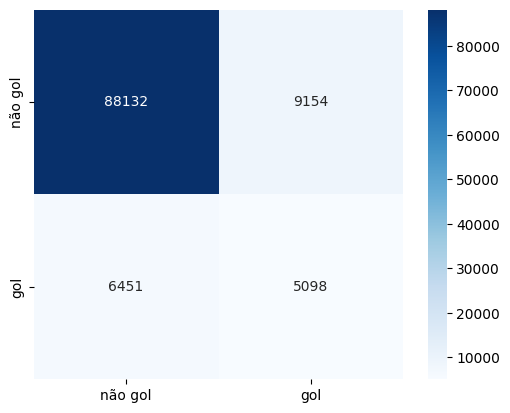

In [ ]:
# Matriz de confusão do modelo de árvore de decisão

mapa_de_calor(y_teste, y_pred, legendas=nome_classes)

In [ ]:
# Avaliação do modelo de árvore de decisão

avaliacao(y_teste, y_pred)

f1: 39.52%
precisão: 35.77%
revocação: 44.14%
acurácia: 85.66%


### Floresta Aleatória (*Random Forest*)

Modelagem para entender o "caminho do gol" de uma liga, um clube ou um jogador com base nas maiores probabilidades, dadas as finalizações já realizadas.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_floresta_aleatoria = RandomForestClassifier(n_estimators=1000, class_weight='balanced')

In [ ]:
modelo_floresta_aleatoria.fit(X_treino, y_treino)

<ipython-input-35-4f63ddb516d7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_floresta_aleatoria.fit(X_treino, y_treino)


KeyboardInterrupt: ignored

In [ ]:
y_pred_1 = modelo_floresta_aleatoria.predict(X_teste)

In [ ]:
# Matriz de confusão do modelo de floresta aleatória

mapa_de_calor(y_teste, y_pred_1, legendas=nome_classes)

In [ ]:
# Avaliação do modelo de floresta aleatória

avaliacao(y_teste, y_pred_1)

### XGBoost
Algoritmo para regressão

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
xg_shot_location_modelo = shot_locations.loc[:, ['league', 'minute', 'X', 'Y', 'xG','h_a', 'situation', 'shotType', 'lastAction']]

In [ ]:
xg_shot_location_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362781 entries, 0 to 362780
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   league      362781 non-null  object 
 1   minute      362781 non-null  int64  
 2   X           362781 non-null  float64
 3   Y           362781 non-null  float64
 4   xG          362781 non-null  float64
 5   h_a         362781 non-null  object 
 6   situation   362781 non-null  object 
 7   shotType    362781 non-null  object 
 8   lastAction  362781 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 24.9+ MB


In [ ]:
td_encoded = pd.get_dummies(xg_shot_location_modelo)
td_encoded

,minute,X,Y,xG,league_Bundesliga,league_EPL,league_La_liga,league_Ligue_1,league_Serie_A,h_a_a,...,lastAction_Save,lastAction_ShieldBallOpp,lastAction_Smother,lastAction_Standard,lastAction_Start,lastAction_SubstitutionOff,lastAction_SubstitutionOn,lastAction_Tackle,lastAction_TakeOn,lastAction_Throughball
0,11,0.903,0.239,0.034118,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,0.852,0.277,0.030941,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0.803,0.277,0.021718,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,0.871,0.324,0.050345,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29,0.918,0.531,0.111078,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362776,69,0.976,0.387,0.301148,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
362777,81,0.843,0.747,0.020374,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
362778,81,0.948,0.723,0.023237,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
362779,84,0.744,0.291,0.010909,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = td_encoded.drop(['xG'], axis=1)
y = td_encoded['xG']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Criar um objeto DMatrix para XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Definir os parâmetros do modelo XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Treinar o modelo XGBoost
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Fazer previsões com o modelo treinado
y_pred = model.predict(dtest)

# Avaliar o desempenho do modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.0759591548994123


### CatBoost
Algoritmo para regressão

In [8]:
# Importando as bibliotecas necessárias
import math
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Lendo o conjunto de dados de exemplo
df = pd.read_csv('top5_xg.csv')
df = df[['league', 'minute', 'X', 'Y', 'xG','h_a', 'situation', 'shotType', 'lastAction']]
df.head()

,league,minute,X,Y,xG,h_a,situation,shotType,lastAction
0,Bundesliga,11,0.903,0.239,0.034118,h,OpenPlay,RightFoot,Chipped
1,Bundesliga,17,0.852,0.277,0.030941,h,OpenPlay,LeftFoot,Pass
2,Bundesliga,26,0.803,0.277,0.021718,h,OpenPlay,LeftFoot,Chipped
3,Bundesliga,28,0.871,0.324,0.050345,h,OpenPlay,LeftFoot,NaN
4,Bundesliga,29,0.918,0.531,0.111078,h,OpenPlay,RightFoot,Chipped


In [10]:
df_encoded = pd.get_dummies(df)
df_encoded

,minute,X,Y,xG,league_Bundesliga,league_EPL,league_La_liga,league_Ligue_1,league_Serie_A,h_a_a,...,lastAction_Save,lastAction_ShieldBallOpp,lastAction_Smother,lastAction_Standard,lastAction_Start,lastAction_SubstitutionOff,lastAction_SubstitutionOn,lastAction_Tackle,lastAction_TakeOn,lastAction_Throughball
0,11,0.903,0.239,0.034118,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,17,0.852,0.277,0.030941,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,26,0.803,0.277,0.021718,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,28,0.871,0.324,0.050345,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,29,0.918,0.531,0.111078,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362776,69,0.976,0.387,0.301148,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
362777,81,0.843,0.747,0.020374,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
362778,81,0.948,0.723,0.023237,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
362779,84,0.744,0.291,0.010909,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('xG', axis=1), df_encoded['xG'], test_size=0.2, random_state=42)

# Definindo o modelo de regressão CatBoost
model = CatBoostRegressor(iterations=10000, learning_rate=0.1, depth=6, loss_function='RMSE')

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

0:	learn: 0.1530411	total: 23.6ms	remaining: 3m 55s
1:	learn: 0.1449690	total: 45.2ms	remaining: 3m 45s
2:	learn: 0.1380058	total: 67.5ms	remaining: 3m 44s
3:	learn: 0.1320709	total: 88.2ms	remaining: 3m 40s
4:	learn: 0.1265591	total: 109ms	remaining: 3m 37s
5:	learn: 0.1217127	total: 130ms	remaining: 3m 35s
6:	learn: 0.1180136	total: 151ms	remaining: 3m 35s
7:	learn: 0.1143376	total: 172ms	remaining: 3m 35s
8:	learn: 0.1110244	total: 194ms	remaining: 3m 34s
9:	learn: 0.1081770	total: 214ms	remaining: 3m 34s
10:	learn: 0.1058303	total: 237ms	remaining: 3m 35s
11:	learn: 0.1037237	total: 264ms	remaining: 3m 39s
12:	learn: 0.1017073	total: 292ms	remaining: 3m 43s
13:	learn: 0.0997293	total: 315ms	remaining: 3m 44s
14:	learn: 0.0979579	total: 339ms	remaining: 3m 45s
15:	learn: 0.0962824	total: 363ms	remaining: 3m 46s
16:	learn: 0.0949896	total: 386ms	remaining: 3m 46s
17:	learn: 0.0937050	total: 407ms	remaining: 3m 45s
18:	learn: 0.0925173	total: 429ms	remaining: 3m 45s
19:	learn: 0.09138

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
# MAPE

MAE: 0.039265000272819775
MSE: 0.005828209234635972
RMSE: 0.07634270911250118
R²: 0.7752533991640398


### Rede neural

In [ ]:
shot_locations

,league,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,home_team,away_team,home_goals,away_goals,date,player_assisted,lastAction
0,Bundesliga,11,SavedShot,0.903,0.239,0.034118,Thomas Müller,h,224,OpenPlay,2014,RightFoot,5447,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,Philipp Lahm,Chipped
1,Bundesliga,17,SavedShot,0.852,0.277,0.030941,Arjen Robben,h,392,OpenPlay,2014,LeftFoot,5447,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,Philipp Lahm,Pass
2,Bundesliga,26,BlockedShot,0.803,0.277,0.021718,Arjen Robben,h,392,OpenPlay,2014,LeftFoot,5447,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,Holger Badstuber,Chipped
3,Bundesliga,28,SavedShot,0.871,0.324,0.050345,Thomas Müller,h,224,OpenPlay,2014,LeftFoot,5447,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,nobody,None
4,Bundesliga,29,SavedShot,0.918,0.531,0.111078,Robert Lewandowski,h,227,OpenPlay,2014,RightFoot,5447,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,Gianluca Gaudino,Chipped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362776,Ligue_1,69,MissedShots,0.976,0.387,0.301148,Nicholas Gioacchini,a,9973,OpenPlay,2021,RightFoot,18201,Angers,Montpellier,2,0,2022-05-21 19:00:00,Béni Makouana,Pass
362777,Ligue_1,81,SavedShot,0.843,0.747,0.020374,Ambroise Oyongo,a,6734,OpenPlay,2021,RightFoot,18201,Angers,Montpellier,2,0,2022-05-21 19:00:00,Pedro Mendes,Chipped
362778,Ligue_1,81,MissedShots,0.948,0.723,0.023237,Nicholas Gioacchini,a,9973,OpenPlay,2021,RightFoot,18201,Angers,Montpellier,2,0,2022-05-21 19:00:00,nobody,Rebound
362779,Ligue_1,84,MissedShots,0.744,0.291,0.010909,Junior Sambia,a,6239,OpenPlay,2021,RightFoot,18201,Angers,Montpellier,2,0,2022-05-21 19:00:00,nobody,BallRecovery


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [ ]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs.float())
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))